## Problem Statement

   An experimental drug was tested on 2100 individual in a clinical trial. The ages of participants ranged from thirteen to hundred. Half of the participants were under the age of 65 years old, the other half were 65 years or older.
   Ninety five percent patients that were 65 years or older experienced side effects. Ninety five percent patients under 65 years experienced no side effects.

   You have to build a program that takes the age of a participant as input and predicts whether this patient has suffered from a side effect or not.

   Steps:

       • Generate a random dataset that adheres to these statements
       • Divide the dataset into Training (90%) and Validation (10%) set
       • Build a Simple Sequential Model
       • Train and Validate the Model on the dataset
       • Randomly choose 20% data from dataset as Test set
       • Plot predictions made by the Model on Test set


## Generating Dataset

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []     # one means side effect experienced, zero means no side effect experienced
train_samples = []

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)  # randomly shuffles each individual array, removing any order imposed on the data set during the creation process

In [6]:
scaler = MinMaxScaler(feature_range = (0, 1)) # specifying scale (range: 0 to 1)
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) # transforms our data scale (range: 13 to 100) into the one specified above (range: 0 to 1), we use the reshape fucntion as fit_transform doesnot accept 1-D data by default hence we need to reshape accordingly here

## Building a Sequential Model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'), 
    Dense(units = 32, activation = 'relu'), 
    Dense(units = 2, activation = 'softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [11]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(x = scaled_train_samples, y = train_labels, validation_split = 0.1, batch_size = 10, epochs = 30, shuffle = True, verbose = 2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.6592 - accuracy: 0.5185 - val_loss: 0.6448 - val_accuracy: 0.6286
Epoch 2/30
1890/1890 - 0s - loss: 0.6384 - accuracy: 0.6386 - val_loss: 0.6158 - val_accuracy: 0.7143
Epoch 3/30
1890/1890 - 0s - loss: 0.6057 - accuracy: 0.7169 - val_loss: 0.5762 - val_accuracy: 0.7714
Epoch 4/30
1890/1890 - 1s - loss: 0.5608 - accuracy: 0.7926 - val_loss: 0.5317 - val_accuracy: 0.8143
Epoch 5/30
1890/1890 - 1s - loss: 0.5175 - accuracy: 0.8323 - val_loss: 0.4916 - val_accuracy: 0.8429
Epoch 6/30
1890/1890 - 1s - loss: 0.4809 - accuracy: 0.8487 - val_loss: 0.4575 - val_accuracy: 0.8714
Epoch 7/30
1890/1890 - 1s - loss: 0.4479 - accuracy: 0.8704 - val_loss: 0.4276 - val_accuracy: 0.8714
Epoch 8/30
1890/1890 - 1s - loss: 0.4188 - accuracy: 0.8751 - val_loss: 0.4009 - val_accuracy: 0.8762
Epoch 9/30
1890/1890 - 1s - loss: 0.3927 - accuracy: 0.8852 - val_loss: 0.3784 - val_accuracy: 0.8905
Epoch 10/30
1890/1890 - 1s - loss: 

## Preprocessing Test Data

In [13]:
test_labels = []
test_samples = []

In [14]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [15]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [16]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Testing the Model using Predictions 

In [17]:
predictions = model.predict(x = scaled_test_samples, batch_size = 10, verbose = 0)

In [19]:
rounded_predictions = np.argmax(predictions, axis = -1)

## Preparing Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

In [23]:
# This function has been taken from the website of scikit Learn. link: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Plotting Predictions using Confusion Matrix

Confusion matrix, without normalization
[[193  17]
 [ 10 200]]


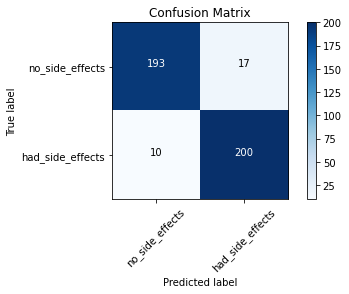

In [24]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')